In [93]:
import numpy as np

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


#target parameters
def func(x,y):
    return np.sin(x**2+y**2)
    #np.sin(x**2+y**2)

In [94]:
# generate training inputs
np.random.seed(0)
p_train = np.random.uniform(-1.5, 1.5, size=(500,2))

p_valid = np.random.uniform(-1.5, 1.5, size=(50,2))

sigma = 0. # noise standard deviation, for the moment it is absent
z_train = np.random.normal(func(p_train[:,0],p_train[:,1]), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(func(p_valid[:,0],p_valid[:,1]), sigma)
z_valid

array([ 0.78556811,  0.38713756, -0.02635896,  0.91497736,  0.56931072,
        0.99243185,  0.41059566,  0.84463702,  0.55827849,  0.60350283,
        0.68800329,  0.9149757 ,  0.97627956,  0.77825091, -0.30248333,
        0.99334558, -0.54537497,  0.59374363,  0.86174278,  0.95091598,
        0.99352566,  0.57325724,  0.87274168,  0.97146268,  0.91468405,
        0.4944272 ,  0.51216195,  0.99988696,  0.88480362,  0.43218026,
        0.42377862, -0.93555773,  0.99997657, -0.58311519,  0.77825438,
       -0.7565802 ,  0.97119603,  0.99078136,  0.5742189 ,  0.17794422,
        0.69752843,  0.01574661,  0.96309584,  0.78214006,  0.99960453,
        0.99665305,  0.94000504,  0.89109286, -0.79605284,  0.14339778])

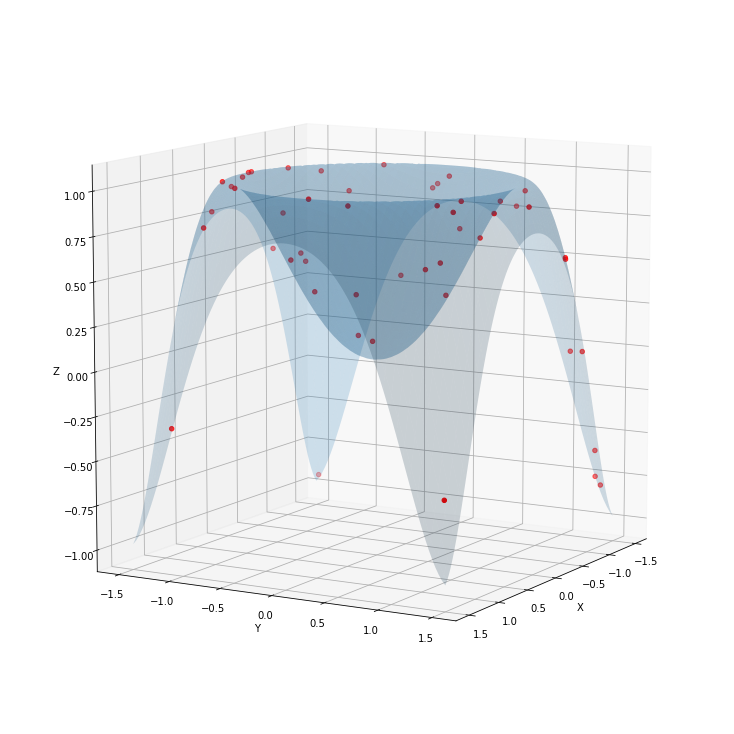

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create x, y coords
X, Y = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))

# dummy data
z_target = func(X,Y)  # ideal (target) polinomial function

# Create matplotlib Figure and Axes
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.view_init(10,30)


# Plot the surface
ax.scatter(p_valid[:,0],p_valid[:,1], z_valid, label='validation points', color='red', depthshade='False')
ax.plot_surface(X,Y, z_target, label='target', alpha=0.2)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [118]:
model = Sequential()

model.add(Dense(108, input_dim=2, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1,activation='relu'))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#model.summary()

In [122]:
history = model.fit(x=p_train, y=z_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(p_valid, z_valid), verbose=1)

Epoch 1/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0846 - mse: 0.0846 - val_loss: 0.2115 - val_mse: 0.2115
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.2105 - val_mse: 0.2105
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0822 - mse: 0.0822 - val_loss: 0.2054 - val_mse: 0.2054
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0809 - mse: 0.0809 - val_loss: 0.2030 - val_mse: 0.2030
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0801 - mse: 0.0801 - val_loss: 0.2074 - val_mse: 0.2074
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0794 - mse: 0.0794 - val_loss: 0.1971 - val_mse: 0.1971
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.1976 - val_mse: 0.1976
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0767 - mse: 0.07

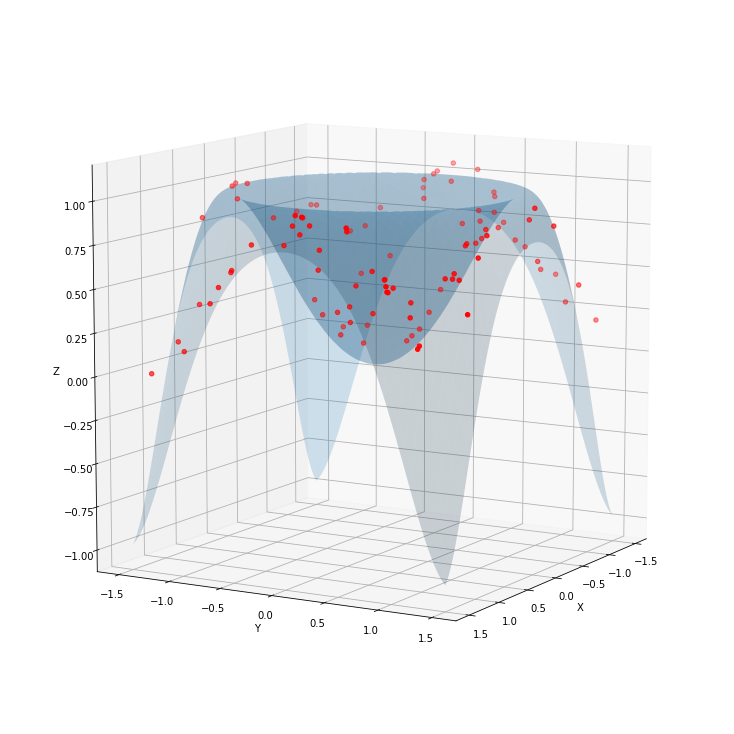

In [123]:
p_predicted = np.random.uniform(-1.5, 1.5, size=(100,2))
z_predicted = model.predict(p_predicted)



# Create matplotlib Figure and Axes
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.view_init(10,30)


# Plot the surface
ax.scatter(p_predicted[:,0],p_predicted[:,1], z_predicted, label='prediction points', color='red', depthshade='False')
ax.plot_surface(X,Y, z_target, label='target', alpha=0.2)

#ax.set_zlim(0,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()